### 이미지 처리 방법
>- 1) 픽셀 기반 이미지 처리 :  픽셀 단위 처리
>- 2) 블록 기반 처리 : 블록(픽셀을 그룹화 한것) 단위로 처리 - 필터
>- 3) 주파수 기반 처리 : 주파수 영역으로 변환하여 처리 - FFT, DCT, WT 등

In [1]:
import cv2

img = cv2.imread("./data/img.jpg")
px = img[200,200]
print(px)

[253 249 248]


- img[200,200] : 픽셀의 좌표, 이미지는 2차원 배열로 나열되어 있음
- Blue(253), Green(249), Red(248) 순서로 출력

### 픽셀값을 임의로 변경하기

In [2]:
import cv2

img = cv2.imread("./data/img.jpg")
img[200,200] = [0,255,0] # 픽셀값을 다른 값으로 변경

cv2.imshow('model', img)
cv2.waitKey()
cv2.destroyAllWindows()

### 픽셀값을 RGB 채널 값으로 변경

In [3]:
import cv2

img = cv2.imread("./data/img.jpg")
img[200,200] = [0,255,0] # 픽셀값을 다른 값으로 변경

#itemset( ( 픽셀 y 위치 , 픽셀 x 위치, 채널), 색상레벨 )
img.itemset( (200, 100, 1), 255)

cv2.imshow('model', img)
cv2.waitKey()
cv2.destroyAllWindows()

- 채널 (0 : Blue, 1 : Green, 2 :Red )

### 이미지 속성 출력

In [4]:
import cv2

img = cv2.imread("./data/img.jpg")

print(img.shape)
print(img.size)
print(img.dtype)

(770, 700, 3)
1617000
uint8


### 이미지 영역 설정 (ROI : Region of Image) 설정

In [5]:
import cv2

img = cv2.imread("./data/img.jpg")
cv2.imshow('original', img)

# 이미지의 영역 설정
# img[200:370, 200:350]   :  출력할 이미지 영역 설정
subimg = img[0:370, 200:550] # y축 200~380, x축 200~350
cv2.imshow('cutting', subimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

### RGB 채널 분리

In [8]:
import cv2

img = cv2.imread("./data/img.jpg")

b = img[ : , : , 0]
g = img[ : , : , 1]
r = img[ : , : , 2]

cv2.imshow('blue channel', b)
cv2.imshow('green channel', g)
cv2.imshow('red channel', r)

cv2.waitKey(0)
cv2.destroyAllWindows()

### RGB 채널 합치기

In [9]:
import cv2

img = cv2.imread("./data/img.jpg")

b = img[ : , : , 0]
g = img[ : , : , 1]
r = img[ : , : , 2]

merge_img = cv2.merge((b,g,r))

cv2.imshow('merge', merge_img)
cv2.imshow('green channel', g)
cv2.imshow('red channel', r)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 드로잉 ( 도형 그리기 )

>- cv2.line ( 배경이미지, 시작점 좌표, 끝점 좌표, 색상, 선두께 ) : 직선그리기 함수
>- cv2.circle( 배경이미지, 중심좌표, 반지름, 색상, 선두께 ) : 원 그리기 함수
>- cv2.rectangle ( 배경이미지, 좌상단 점 좌표, 우하단 점 좌표, 색상, 선두께 ) : 사각형 그리기 함수
>- cv2.ellipse ( 배경이미지, 중심좌표, 장출/단호길이, 호의 시작각, 화의 종료각, 색상, 선두께 ) : 타원 그리기 함수
>- cv2.putText( 배경이미지, 출력내용, 출력시작좌표(x,y) 폰트, 크기, 색상, 굵기 ) : 텍스트 입력함수

In [34]:
import cv2
img = cv2.imread("./data/img.jpg")

#사각형
img = cv2.rectangle(img,(200,200), (400,400),(0,0,255),5)

#텍스트
font = cv2.FONT_HERSHEY_SIMPLEX # 폰트 설정
img = cv2.putText(img, 'Quokka', (100,200), font, 2, (0,255,255),4)
cv2.imshow('rectangle', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 한글 출력하기

In [43]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np

img = cv2.imread('./data/img.jpg')

#폰트와 폰트 크기 설정
font = ImageFont.truetype('fonts/gulim.ttc', 30)
# 이미지를 PIL 이미지로 변환
img_pil = Image.fromarray(img)
# PIL이미지에 문자 출력
draw = ImageDraw.Draw(img_pil)

draw.text ( (200, 20), '나의사랑너의사랑우리쿼카싸랑해!!', font = font, fill=(0,0,255,0))

#PIL 이미지를 numpy형태로 변환
img = np.array(img_pil)

cv2.imshow('font', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 합성하기(비트연산)

In [48]:
import cv2
import numpy as np

img = cv2.imread('./data/img.jpg')
mask = cv2.imread('./data/S2.png')

rows, cols, channels = mask.shape
roi = img[50: rows +50, 150:cols+150]

mask2gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
ret, mask_b = cv2.threshold(mask2gray, 200,250, cv2.THRESH_BINARY)

mask_b_inv = cv2.bitwise_not(mask_b)
img_bg = cv2.bitwise_and(roi, roi, mask = mask_b)
img_fg = cv2.bitwise_and(mask, mask, mask=mask_b_inv)
bg_fg = cv2.add(img_bg, img_fg)
img[50:rows+50, 150:cols+150] = bg_fg
cv2.imshow('result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-q0nmoxxv\opencv\modules\core\src\arithm.cpp:250: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


### 색상 추적하기

In [49]:
import cv2
import numpy as np

img = cv2.imread('./data/img.jpg')
cv2.imshow( 'Original', img)

# HSV 색상공간으로 변형
hsv = cv2.cvtColor (img, cv2.COLOR_BGR2HSV)
# HSV 모델의 특정색상(red)의 lower에서 upper까지 범위 설정
lower = np.array( [-10, 100, 100] )
upper = np.array( [10, 255, 255])

# mask 이미지로 HSV의 lower 에서 upper까지의 범위 색상을 마스크로 설정
mask = cv2.inRange(hsv, lower, upper)
# 저장된 이미지에서 mask 이미지( red 아닌 경우 0으로 채워진 이미지 ) 와 AND 연산
img2 = cv2.bitwise_and(img, img, mask = mask)

cv2.imshow( 'Extract Color', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

- cv2.cvtColor (img, cv2.COLOR_BGR2HSV) : HSV 색상 공간으로 변경
- cv2.inRange(hsv, lower, upper) : 범위에 해당하는 값이 아닌경우 0으로 채움
- cv2.bitwise_and(img, img, mask = mask) : mask 값이 0이 아닌 부분만 AND 연산
- HSV 모델의 blue : 
> lower = np.array( [110, 100, 100] )
> upper = np.array( [130, 255, 255])
- HSV 모델의 green :
> lower = np.array([50, 100, 100])
> upper = np.array([70, 255, 255])
- HSV 모델의 red :
> lower = np.array([-10, 100, 100])
> upper = np.array([10, 255, 255])

### 이미지 필터링

In [5]:
import cv2
import numpy as np

img = cv2.imread('./data/img.jpg')
cv2.imshow('master', img)
#Kernel은 필터링할 마스크 생성 5X 5 생성하여 특정 숫자로 채운다
#숫자값은 주변 픽셀과 연산을 하기 위한 실수값
kernel = np.ones((5,5), np.float32)/25
#cv2.filter2D(이미지,색상정보,마스크)
#색상정보가 -1이면 원본 이미지 정보
blur = cv2.filter2D(img, -1, kernel)

cv2.imshow('blur', blur)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

### 침식과 팽창

In [3]:
import cv2
import numpy as np

>- Erosion : 이미지의 경계부분을 배경 픽셀로 변경하는 작업
>- Dilation : 이미지의 배경부분을 전경 픽셀로 변경하는 작업
>- iteration = 1 : 반복 적용 횟수

In [6]:
img = cv2.imread('./data/img.jpg', cv2.IMREAD_GRAYSCALE)

In [10]:
kernel = np.ones((3,3), np.uint8)

erosion = cv2.erode(img, kernel, iterations = 2)
dilation = cv2.dilate( img, kernel, iterations = 2)

cv2.imshow('original', img)
cv2.imshow('erosion', erosion)
cv2.imshow('dilation', dilation)
k= cv2.waitKey(0)
cv2.destroyAllWindows()

### Opening과 Closing

In [1]:
import cv2
import numpy as np

img1 = cv2.imread('./data/img.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./data/img2.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('originalA', img1)
cv2.imshow('originalB', img2)

#Opening : erosion 수행 후 바로 dilate을 수행하여 원래 이미지 크기로 돌려놓는 것
#검은색에 가까운 이미지의 노이스 제거 효과
#Closing : dilate 수행 후에 바로 erocion을 수행하여 원래 이미지 크기로 돌려놓는 것
#흰색에 가까운 이미지의 노이스 제거 효과
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(img1,cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img2,cv2.MORPH_OPEN, kernel)

cv2.imshow('opening', opening)
cv2.imshow('closing', closing)

k= cv2.waitKey(0)
cv2.destroyAllWindows()

### 에지 추출 - Canny 에지 추출기

In [36]:
import cv2

img = cv2.imread('./data/map.png', cv2.IMREAD_GRAYSCALE)

edge = cv2.Canny(img, 50, 200)
cv2.imshow('edge', edge)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

### 윤곽선 추출

In [37]:
import cv2

img = cv2.imread('./data/map.png')
gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)

cv2.imshow('gray',gray)
#cv2.threshold(이미지,임계값,픽셀 최대값,임계값 적용방법)
#이진 이미지 생성 (0인경우 임계값보다 크면 픽셀 최대값을 할당하고, 적으면 0을 할당)
ret, thr = cv2.threshold(gray, 127, 255, 0)
# RETR_TREE ( 모든 외곽선을 추출하고 외곽선 간의 상관관계 추출)
# CHAIN_APPROX_SIMPLE ( 수평, 수직,대각선인 경우 중간의 점들은 버리고 끝점들만 남김)
contours,_ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, 79, (0,0,255), 1)
cv2.imshow('contour', img)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-q0nmoxxv\opencv\modules\imgproc\src\drawing.cpp:2490: error: (-215:Assertion failed) 0 <= contourIdx && contourIdx < (int)last in function 'cv::drawContours'


- cv2.threshod ( 이미지, 임계값, 픽셀 최대값, 임계값 적용방법 )
- 이진 이미지 생성 ( 0인 경우 임계값보다 크면 픽셀 최대값을 할당하고, 적으면 0을 할당)
- cv2.findContours(이미지, 추출모드, 근사방법) 
- RETR_TREE ( 모든 외곽선을 추출하고 외곽선 간의 상관관계 추출)
- CHAIN_APPROX_SIMPLE( 수평, 수직, 대각선인 경우 중간의 점들은 버리고 끝점들만 남김)
>- contours를 찾는 방법
>>- cv2.RETR_EXTERNAL :  contours line중 가장 바깥쪽 Line만 찾음
>>- cv2.RETR_LIST     : 모든 contours line을 찾지만, hierarchy 관계를 구성하지 않음
>>- cv2.RETR_CCMP :  모든 contours line을 찾으며, hierarcy 관계는 2-level로 구성함
>>- cv2.RETR_TREE : 모든 contours line을 찾으며, 모든 hierarchy 관계를 구성함.
>
>- contours를 찾을 때 사용하는 근사치 방법
>>- cv2.CHAIN_APPROX_NONE : 모든 contours point 를 저장
>>- cv2.CHAIN_APPROX_SIMPLE : contours line을 그릴 수 있는 point만 저장(ex : 사각형이면 4개 point)
>>- cv2.CHAIN_APPROX_TC89_L1 : contours point를 찾는 알고리즘
>>- cv2.CHAIN_APPROX_TC89_KCOS : contours point를 찾는 알고리즘
>
- cv2.drawContours( 원본 이미지, 외곽선 값, 그릴 외곽선 인덱스, 외곽선 색상, 선의 두께) : 인덱스가 -1이면 모든 외곽선을 그림

### 이미지 모멘트
- 객체의 무게중심, 면적 등과 같은 특성을 구할 때 유용
- 종류 : 공간 모멘트 (Sparial Moments), 중심 모멘트(Central Moments), 평준화된 중심 모멘트(Central Nomalized Moments)
- cv2.moments( 윤곽선 데이터 ) 함수를 활용하여 구함

In [38]:
contour = contours[3]
mmt = cv2.moments( contour)

print(mmt['m00'],mmt['m10'],mmt['m01'])

# 윤곽선의 무게중심
cx = int(mmt['m10']/mmt['m00'])
cy = int(mmt['m01']/mmt['m00'])
cv2.circle(img, (cx, cy), 2, (0,0,255), -1)

cv2.imshow('contour_center', img)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

IndexError: list index out of range

### 이미지 모멘트 종류

>- 공간 모멘트(Spatal Moments)
>>- m00, m10, m01, m11, m02, m30, m21, m12, m03
>- 중심 모멘트(Central Moments)
>>- mu20, mu11, mu02, mu30, mu21, mu12, mu03
>-평준화된 중심 모멘트(Central Normalized Moments)
>>- nu20, nu11, nu02, nu30, nu21, nu03

### 윤곽선 면적과 길이 계산

In [39]:
# 윤곽선 면적 계산
contour_area = cv2.contourArea(contour)

# 윤곽선의 길이 계산 (True : 윤곽선을 폐곡선으로 설정)
contour_len = cv2.arcLength(contour, True)

print("윤곽선 면적 : " , contour_area)
print("윤곽선 길이 : ", contour_len)

윤곽선 면적 :  0.5
윤곽선 길이 :  18.727921843528748


### 전체 윤곽선들의 면적 계산

In [40]:
import numpy as np

area = [cv2.contourArea(c) for c in contours]

print(area)

[14095.5]


### 윤곽선 근사화 ( 꼭지점 줄이기 )

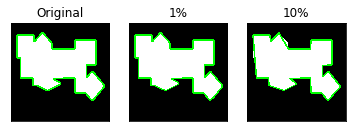

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./data/map.png')
img2 = img.copy()
img3 = img.copy()
imggray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

ret, thr = cv2.threshold( imggray , 200, 255, 0 )
#contours, _ = cv2.findContours( thr , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
contours, hierachy = cv2.findContours(thr, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(img, contours, 0 , (0,255,0), 2)
cnt = contours[0]

apsilon = 0.001 * cv2.arcLength( cnt, True)
apsilon2 = 0.01 * cv2.arcLength( cnt, True)

approx = cv2.approxPolyDP( cnt , apsilon , True )
approx2 = cv2.approxPolyDP( cnt , apsilon2 , True )


cv2.drawContours( img , [cnt], 0,(0,255,0) , 2)
cv2.drawContours( img2 , [approx], 0,(0,255,0) , 2)
cv2.drawContours( img3 , [approx2], 0,(0,255,0) , 2)
#cv2.imshow('approx_contour', img)

titles = ['Original', '1%', '10%']
images = [img, img2, img3]

for i in range(3):
    plt.subplot(1,3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.xticks([]), plt.yticks([])
    
k = cv2.waitKey(0)
cv2.destroyAllWindows()

### 사각형, 원, 타원으로 외곽선 그리기
>- x,y,w,h = cv2.boundingRect(contour) :사각형 윤곽선(시작좌표, 길이, 높이 반환)

>- (x,y),r = minEnclosigCircle( cotour) : 원 윤곽선(중심좌표, 반지름 반환)
>- ellipase = cv2.fitEllipase(contour) : 타원 윤곽선

In [61]:
import cv2

img = cv2.imread('model/img.jpg')
imggray = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold( imggray, 100,255,0)
contours, _ = cv2.findContours( thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img1=  img.copy()
x,y,w,h = cv2.boundingRect(contours[4])
cv2.rectangle(img1, (x,y), (x+h , y+h), (0,0,255),3)
cv2.imshow('rect contour', img1)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-q0nmoxxv\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### 히스토그램(histogram)

In [62]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('model/talking.JPG', cv2.IMREAD_GRAYSCALE)
cv2.imshow('original', img)

hist = cv2.calcHist( [img],[0],None, [256],[0,256])

plt.plot(hist)
plt.xlim([0,255])
plt.show()
k= cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-q0nmoxxv\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


- 히스토그램 (Histogram) : 이미지의 색상을 벼라로 픽셀의 개수를 그래프로 표시한 것
- Numpy, Matplotlib 라이브러리에서 함수를 제공하지만, OpenCV에서 제공하는 calcHist() 함수가 가장 성능이 좋음
>- calcHist([이미지],[채널],특정마스크,[색상 개수],[픽셀값의 범위])
>- 채널은 흑백영상인 경우는 0 , 칼라영상인 경우는 B(0), G(1), R(2)

### 히스토그램 균일화
 - 색상 분포를 균일하게 변경하여 이미지의 콘트라스트를 강조하는 방법

In [60]:
img = cv2.equalizeHist(img)
cv2.imshow('equalize', img)

hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.plot(hist)
plt.xlim([0,255])
plt.show()

k = cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-q0nmoxxv\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


### 템플릿 매칭
 - 템플릿 매칭 : 어떤 이미지에서 템플릿 이미지와 매칭되는 부분이 있는지 검색하는 방법

In [70]:
import cv2
import numpy as np

img = cv2.imread('model/majak1.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
temp = cv2.imread('model/majak.png', cv2.IMREAD_GRAYSCALE)
# 이미지의 크기를 반환
w,h = temp.shape[::-1]
# matchTemplate( 원본 이미지, 부분 이미지, 매칭 방법)
res = cv2.matchTemplate( imgray , temp, cv2.TM_CCOEFF_NORMED)
# res가 0.7보다 큰 값들의 위치를 튜플로 반환
loc = np.where( res >= 0.7)
# 동일한 개수를 가진 리스트나 튜플을 같은 위치의 멤버들끼리 묶어서 튜플로 만든 다음 이를 멤버로 하는 리스트를 만듦
for pt in zip(*loc[::-1]): # loc의 순서를 거꾸로하여 튜플을 묶고 리스트로만 옮긴다
                            # x,y 좌표 순서가 바뀌므로
    # cv2.rectangle(이미지, 시작위치, 종료 위치, 색상, 두께)
    cv2.rectangle(img, pt, (pt[0]+w, pt[1]+h), (0,0,255),2)

cv2.imshow('match', img)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-q0nmoxxv\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


##### matchTemplate 옵션
- TM_SQDIFF
- TM_SQDIFF_NORMED
- TM_CCORR
- TM_CCORR_NORMED
- TM_CCOEFF
- TM_CCOEFF_NORMED

### 하프변환을 이용하여 원 찾기

In [63]:
import cv2
import numpy as np

img = cv2.imread('./data/hough.jpg')

imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(imggray, cv2.HOUGH_GRADIENT, 1, 10, 
                          param1=60, param2=50, minRadius=10, maxRadius=100)

if circles is not None:
    
    circles = np.uint16(np.around(circles))
    
    
    for i in circles[0, :]:
        cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 0), 4)
                   
    cv2.imshow("Hough Circles", img)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()               
else:
    print("원이 없습니다")                   

- cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, minDis, param1, param2, minRadius, maxRadius)
  - cv2.HOUGH_GRADIENT : 원을 찾는 방법
  - minDis : 원 중심들 간의 최소 거리 (0보다 커야 함)
  - param1 : Canny 에지 추출자의 maxVal 값
  - parma2 : 허프변환 카운팅 값 (너무 작으면 원하지 않는 많은 원들이 검출됨)
  - minRadius : 원의 최소 반지름
  - maxRadius : 원의 최대 반지름

### ORB (Oriented FAST and Rotated BRIEF) 알고리즘
>- ORB 알고리즘  : SIFT, SURF 대신에 자유롭게 사용할 수 있는 OpenCV의 이미지 특성 검출 알고리즘

In [71]:
import cv2
import numpy as np

img = cv2.imread('./data/bfly.png')
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = None

orb = cv2.ORB_create() # ORB객체 생성
#img의 키포인트(영상의 특징점)들과 디스크립터( 키포인터 주변 영역의 특성을 표현하는 영상 표현자)를 계산
kp, des = orb.detectAndCompute( img, None )


img2 = img.copy()
#키포인트 마커 그리기
# markerType = 3 : 마커의 형태
# markerSize = 10 : 마커 크기
# thickness = 1  : 마커선 두께
# color = (0,0,255) : 마커 색상
for marker in kp :
    img2 = cv2.drawMarker( img2, tuple(int(i) for i in marker.pt), 
                          markerType = 3,
                          markerSize = 10,
                          thickness = 1,
                          color = (0,0,255))
cv2.imshow('ORB', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### ORB기반의 이미지 특성 매칭

In [73]:
import cv2
import numpy as np

img1 = cv2.imread("data/img.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("data/map.jpg", cv2.IMREAD_GRAYSCALE)
res = None

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x:x.distance)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches[:12], res, flags=0)

cv2.imshow('matching', res)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
global frame, frame2, inputmode, trackWindow, roi_hist, out

try:
    print('카메라를 구동합니다')
    cap = cv2.VideoCapture(0)
    cap.set(3, 480)
    cap.set(4, 320)
except:
    print("카메라 구동 실패")

ret, frame = cap.read()

# 마우스 이벤트를 감지할 창의 이름을 설정
cv2.namedWindow("frame")
# frame인 창에서 마우스 이벤트가 발생하면 onMouse 함수가 호출
cv2.setMouseCallback("frame", onMouse, param=(frame, frame2))

# cv2.TERM_CRITERIA_EPS : 알고리즘의 반복회수 설정 (10회)
# cv2.TERM_CRITERIA_COUNT : C1_o, C1_r이 차가 1pt일 때까지 반복
termination = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    ret, frame = cap.read()

    if not ret:
        print("비디오 읽기 오류")
        break
        
    if trackWindow is not None:
        hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)    
        # 히스토그램의 역투사(backproject)를 계산 (원하는 영역의 색상만 추출)
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        # trackWinodw에 해당하는 이동 객체를 추적
        ret, trackWindow = cv2.CamShift(dst, trackWindow, termination)
        
        # 사각형 영역의 꼭지점 4개의 좌표를 반환
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        # 폴리곤이 그려질 이미지, 폴리곤의 꼭지점 좌표, 폐곡선 생성 여부, 색상, 두께
        cv2.polylines(frame, [pts], True, (0, 255, 0), 2)
                    
    cv2.imshow("frame", frame)
    
    k = cv2.waitKey(30) 

    # i라는 문자를 입력하면
    if k == ord('i'):
        print("추적할 영역을 설정하고 아무키나 누르세요")
        inputmode = True
        frame2 = frame.copy()
        
        while inputmode:
            cv2.imshow("frame", frame)
            cv2.waitKey(0) 
        
    if k == 49:
        cap.release()
        cv2.destroyAllWindows() 
        break  